# ML project

### Data Loading

In [50]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")

## Data prep

### Data Seperation as X and y

In [51]:
y = df["logS"]
X = df.drop(columns = ["logS"])

### Data split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## **Model building**

### **Linear Regression**


#### Trainning the Model

In [53]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Applying the Model to make prediciton

In [54]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

#### Evaluate Model Preformance

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [61]:
lr_results

,Method,Trainning MSE,Trainning R2,Testing MSE,Testing R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


In [56]:
print('LR MSE (Train): ' , lr_train_mse)
print('LR R2 (Train): ' , lr_train_r2)
print('LR MSE (Test): ' , lr_test_mse)
print('LR MSE (Test): ' , lr_test_r2)

LR MSE (Train):  1.0075362951093687
LR R2 (Train):  0.7645051774663391
LR MSE (Test):  1.0206953660861033
LR MSE (Test):  0.7891616188563282


In [88]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Trainning MSE', 'Trainning R2', 'Testing MSE', 'Testing R2']

### **Random Forest**

#### Trainning the Model

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Applying the Model to make prediciton

In [69]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

#### Evaluate Model Preformance

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [76]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Trainning MSE', 'Trainning R2', 'Testing MSE', 'Testing R2']

### **Model Comparison**

In [110]:
df_models = pd.concat([lr_results, rf_results], axis = 0).reset_index(drop = True)
df_models

,Method,Trainning MSE,Trainning R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# Data Visualization of prediction results

Text(0.5, 0, 'Experimental LogS')

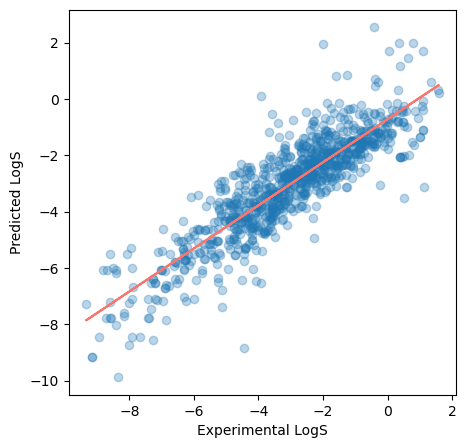

In [139]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred,  1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')